In [4]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable


In [54]:
import mysql.connector
from dotenv import load_dotenv
import os
import pandas as pd
load_dotenv('s.env') 
db_host=os.getenv('DB_HOST')
db_user=os.getenv('DB_USER')
db_password=os.getenv('DB_PASSWORD')
db_database=os.getenv('DB_DATABASE')

# Connect to the MySQL database
db_connection = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_database
)

# Write SQL query to load the movies dataset
query = "SELECT * FROM imdb_top_1000;"
movies_df = pd.read_sql(query, db_connection)

# Close the connection
db_connection.close()

# Show the first few rows
movies_df.head()

C:\Users\Sreej\AppData\Local\Temp\ipykernel_2852\45253611.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  movies_df = pd.read_sql(query, db_connection)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [9]:
# Fill missing IMDb ratings with the average IMDb rating
movies_df['IMDB_Rating'].fillna(movies_df['IMDB_Rating'].mean(), inplace=True)

# Fill missing gross revenue with 0 (indicating no revenue)
movies_df['Gross'].fillna(0, inplace=True)

# Drop rows with missing important columns (e.g., series_title or genre)
movies_df.dropna(subset=['Series_Title', 'Genre'], inplace=True)


In [12]:
# Convert released_year to integer
movies_df['Released_Year'] = movies_df['Released_Year'].astype(int)


In [14]:
# Remove outliers: for example, movies with IMDb rating > 10 (unrealistic)
movies_df = movies_df[movies_df['IMDB_Rating'] <= 10]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


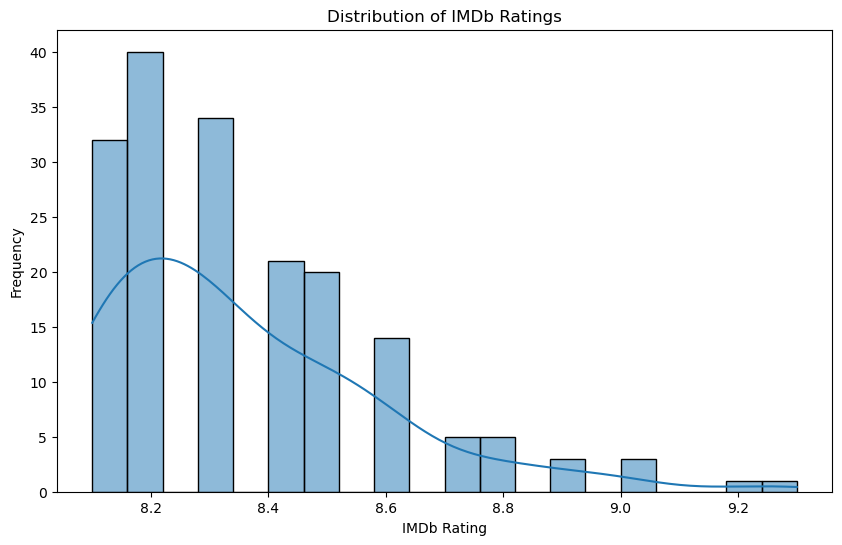

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of IMDb Ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

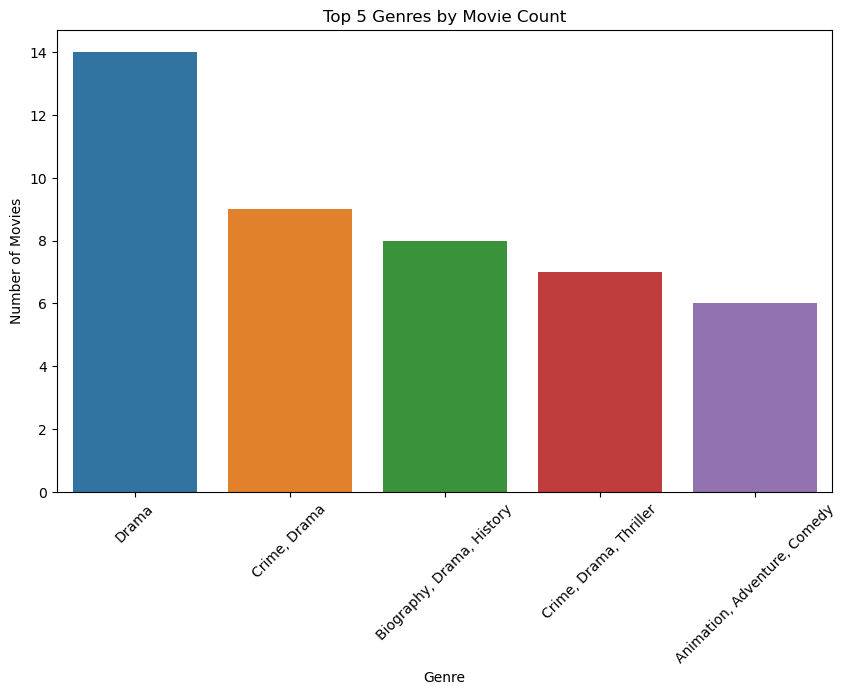

In [17]:
# Top 5 genres by movie count
genre_counts = movies_df['Genre'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Top 5 Genres by Movie Count')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


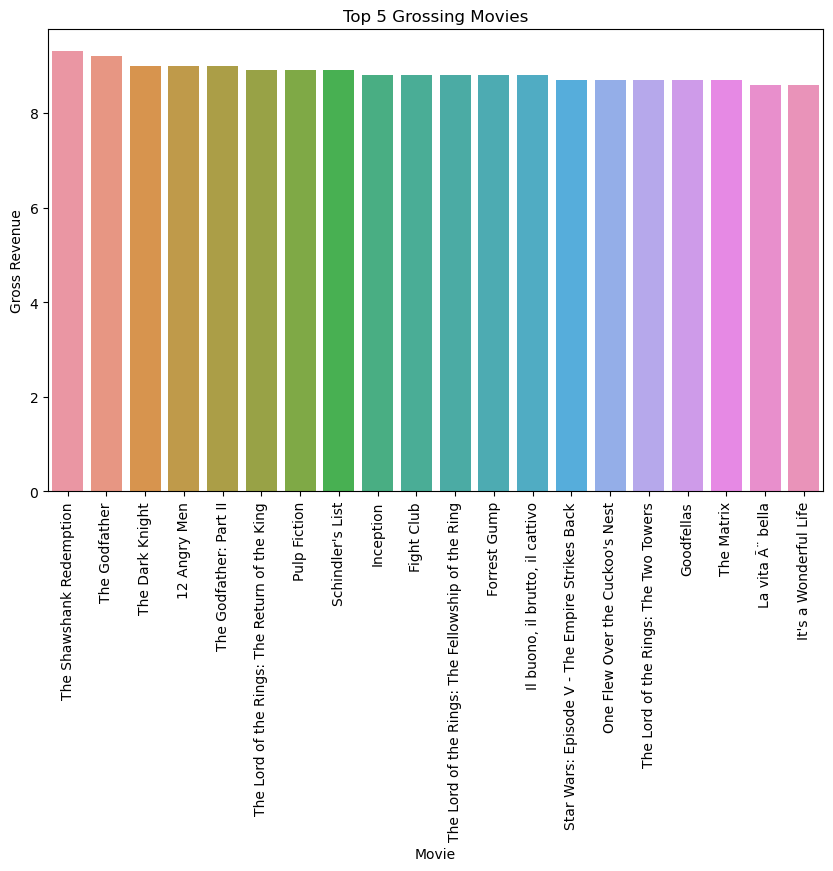

In [30]:
top_grossing = movies_df[['Series_Title', 'IMDB_Rating']].sort_values(by='IMDB_Rating', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_grossing['Series_Title'], y=top_grossing['IMDB_Rating'])
plt.title('Top 5 Grossing Movies')
plt.xlabel('Movie')
plt.ylabel('Gross Revenue')
plt.xticks(rotation=90)
plt.show()


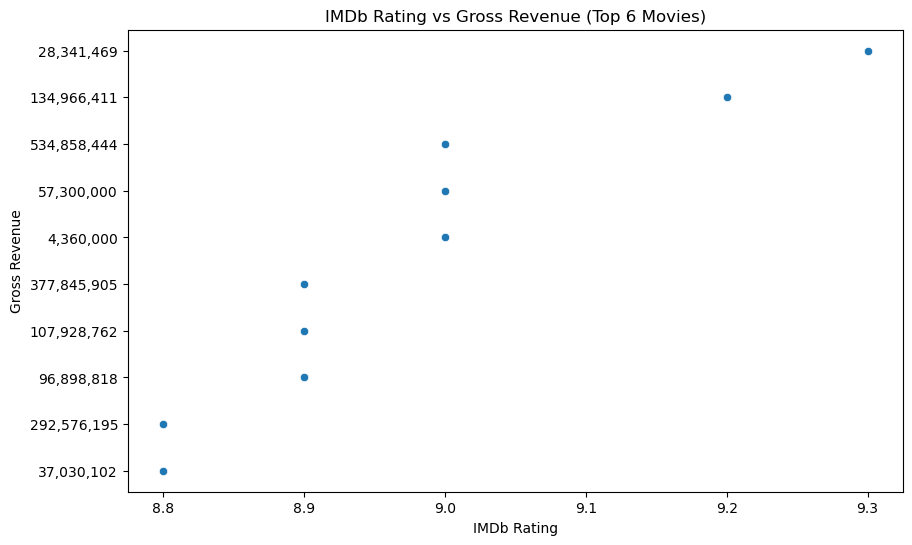

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 6 rows of the DataFrame
top_6_movies = movies_df.head(10)

# Create the scatter plot for the top 6 rows
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=top_6_movies)
plt.title('IMDb Rating vs Gross Revenue (Top 6 Movies)')
plt.xlabel('IMDb Rating')
plt.ylabel('Gross Revenue')
plt.show()
